In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, validation_curve, cross_val_score, StratifiedShuffleSplit, StratifiedKFold




In [2]:
df = pd.read_csv('phishing_benign_2022.csv')



In [4]:
df.head()

,id,datetime,url,title,source_code,redirected_urls,header_info,certificate_information,screenshot_id,label
0,1773,2022-07-23 14:50:15.804017,https://www.cognitoforms.com/Agt12/OUTLOOK,OUTLOOK | Cognito Forms,"<html lang=""en"" class=""cog-public-form""><head>...",NaN,"{\n ""cache-control"": ""no-cache, no-store, mus...","{\n ""OCSP"": [\n ""http://ocsp.godaddy.com/""...",2022_07_23_14_50_15_www.cognitoforms.com.png,1
1,426265,2021-08-15 00:00:00,https://regularizacomclientes.com/itokendoscli...,Nan,"<html lang=""pt-br"" class=""js flexbox flexboxle...",Nan,Nan,Nan,Nan,1
2,50017,2022-10-18 21:36:34.652189,https://accounts.google.com/v3/signin/identifi...,Sign in - Google Accounts,"<html lang=""en-US"" dir=""ltr"" class=""eC9N2e""><h...",{https://sites.google.com/view/directionobweb/...,"{\n ""content-type"": ""text/html; charset=utf-8...","{\n ""OCSP"": [\n ""http://ocsp.pki.goog/gts1...",2022_10_18_21_36_34_accounts.google.com.png,1
3,419524,2021-08-15 00:00:00,http://1itaunet-sempre-lado-a-lado-com-voce.00...,Nan,"<html lang=""en-us""><head>\n <script async=""...",Nan,Nan,Nan,Nan,1
4,547035,2021-08-15 00:00:00,https://www.alfazen.com.tr/Entscheidung-289766...,Nan,"<html lang=""en"" class=""font-marketsans""><head>...",Nan,Nan,Nan,Nan,1


In [5]:
df['url_length'] = df['url'].apply(len) # Calculates length of each url and stores in new column called url_length
df['num_subdomains'] = df['url'].apply(lambda x: x.count('.') - 1) # Counts the number of subdomains and stores in new column called num_subdomains
df['has_https'] = df['url'].apply(lambda x: 1 if x.startswith('https') else 0) 
df['num_hyphens'] = df['url'].apply(lambda x: x.count('-'))
df['num_special_chars'] = df['url'].apply(lambda x: sum(x.count(char) for char in ['@', '%', '#', '$']))
suspicious_keywords = ['login', 'secure', 'account', 'verify', 'update', 'password']
df['has_suspicious_keyword'] = df['url'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in suspicious_keywords) else 0)
df['num_external_links'] = df['source_code'].apply(lambda x: str(x).lower().count('href='))

In [6]:
# List of columns to drop
columns_to_drop = ['id', 'datetime', 'url', 'title', 'source_code', 'redirected_urls', 'header_info', 
                   'certificate_information', 'screenshot_id',]

# Drop the columns
df = df.drop(columns=columns_to_drop)


In [7]:
df.head()

,label,url_length,num_subdomains,has_https,num_hyphens,num_special_chars,has_suspicious_keyword,num_external_links
0,1,42,1,1,0,0,0,8
1,1,70,1,1,0,0,0,13
2,1,384,5,1,3,13,1,6
3,1,70,2,0,6,0,0,8
4,1,164,4,1,7,1,0,22


In [8]:
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
clf = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1')
print(scores)
print(scores.mean())

[0.8670412  0.86019478 0.8593947  0.86498423 0.85468998]
0.8612609796368356


In [28]:
ss_split = StratifiedShuffleSplit(n_splits = 100, test_size=.25)
scores_ss = cross_val_score(clf, X_train, y_train, cv = ss_split, scoring = 'f1')

In [31]:
scores_ss

array([0.86205128, 0.87155043, 0.853     , 0.85837563, 0.86178455,
       0.8556391 , 0.86290323, 0.86251882, 0.86586587, 0.8604119 ,
       0.85750572, 0.85316456, 0.86978508, 0.85347432, 0.857797  ,
       0.86148392, 0.85177665, 0.85902972, 0.86695279, 0.85597964,
       0.86169406, 0.86097068, 0.85598583, 0.86915186, 0.85329265,
       0.86354481, 0.8560682 , 0.86532663, 0.86211243, 0.86474279,
       0.86371593, 0.86663286, 0.8541507 , 0.86599496, 0.86868687,
       0.85700025, 0.86325863, 0.85888945, 0.86109713, 0.85548257,
       0.85793451, 0.87487487, 0.85735811, 0.85778894, 0.85786802,
       0.86577688, 0.86078531, 0.87031408, 0.85692733, 0.86971743,
       0.86787758, 0.86570925, 0.86805909, 0.85486682, 0.8642225 ,
       0.85830577, 0.86168602, 0.86231156, 0.8596713 , 0.87468546,
       0.86709806, 0.86873268, 0.86304781, 0.86419753, 0.85526648,
       0.85491968, 0.85943775, 0.86307264, 0.85513432, 0.85550287,
       0.86362491, 0.86160827, 0.85994962, 0.85835411, 0.86596

In [32]:
scores_ss.mean()

0.8607937314811521

<Figure size 1000x600 with 0 Axes>

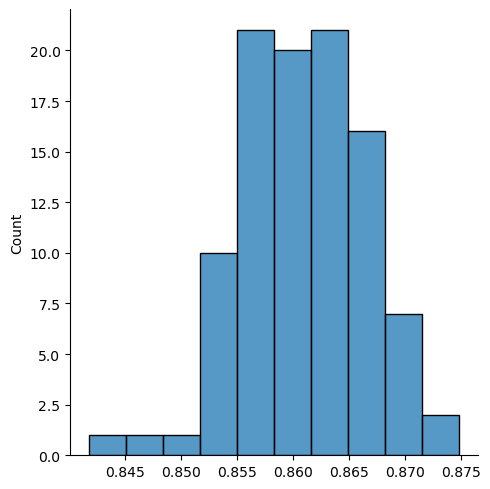

In [34]:
plt.figure(figsize=(10,6))
sns.displot(scores_ss, bins=10);

In [45]:
import scipy

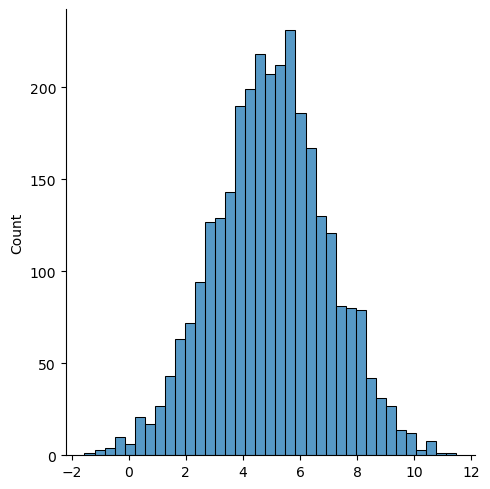

In [50]:
sns.displot(scipy.stats.norm(5, scale=2).rvs(3000));

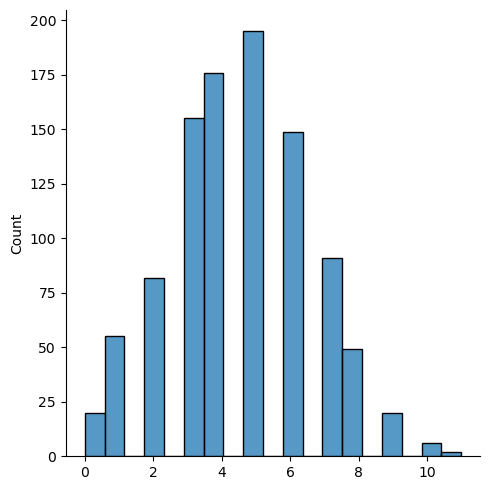

In [51]:
numbers = scipy.stats.norm(5, scale=2).rvs(1000)
sns.displot(numbers.astype(int));

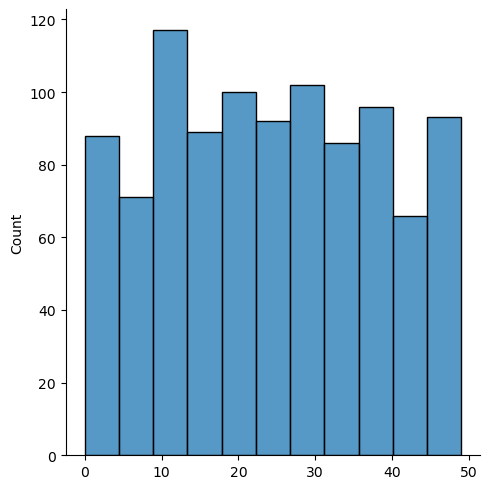

In [47]:
sns.displot(scipy.stats.randint(0,50).rvs(1000));

In [52]:
params = {'max_depth': scipy.stats.randint(2,100), 'min_samples_leaf': scipy.stats.randint(2,50), 'min_samples_split': scipy.stats.randint(2,50)}


In [54]:
rand_search = RandomizedSearchCV(clf, params, n_iter=4, scoring='f1', n_jobs= -1, cv = StratifiedKFold(n_splits=5))

In [55]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=4, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x75eda65d4800>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x75eda9f91400>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x75eda66f77a0>},
                   scoring='f1')

In [56]:
rand_search.best_score_

0.8906730652206066

In [57]:
rand_search.best_params_

{'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 13}

In [58]:
fig = plotting.plot_learning_curve(rand_search.best_estimator_, X_train, y_train, cv=StratifiedKFold(n_splits=5), train_sizes = np.linspace(0.1,1.0,10), scoring = 'f1')

NameError: name 'plotting' is not defined

In [42]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006828,0.000978,0.003643,0.000593,2,2,2,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.887209,0.880511,0.869191,0.873556,0.867142,0.875522,0.007425,17
1,0.007343,0.000529,0.003852,0.000364,2,2,20,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.887209,0.880511,0.869191,0.873556,0.867142,0.875522,0.007425,17
2,0.006468,0.000581,0.003640,0.000188,2,2,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.887209,0.880511,0.869191,0.873556,0.867142,0.875522,0.007425,17
3,0.006065,0.000849,0.003289,0.000637,2,20,2,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.887209,0.880511,0.869191,0.873556,0.867142,0.875522,0.007425,17
4,0.006263,0.000344,0.002952,0.000352,2,20,20,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.887209,0.880511,0.869191,0.873556,0.867142,0.875522,0.007425,17


In [43]:
results.shape

(27, 16)

In [44]:
results['rank_test_score']
print(results.iloc[10])

mean_fit_time                                                       0.021049
std_fit_time                                                        0.002197
mean_score_time                                                     0.003618
std_score_time                                                      0.000524
param_max_depth                                                           20
param_min_samples_leaf                                                     2
param_min_samples_split                                                   20
params                     {'max_depth': 20, 'min_samples_leaf': 2, 'min_...
split0_test_score                                                    0.89625
split1_test_score                                                   0.886132
split2_test_score                                                    0.88537
split3_test_score                                                   0.880982
split4_test_score                                                   0.876913

In [ ]:
fig = plotting.plot_learning_curve()